# 三个库的一些基本操作

##  numpy

In [1]:
import numpy as np

1. Create a null vector of size 10

In [3]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

2. Create a null vector of size 10 but the fifth value which is 1 

In [4]:
x[4] = 1
x

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

3. Create a vector with values ranging from 10 to 49 

In [9]:
x = np.random.randint(10,49,(10))
x

array([42, 15, 28, 43, 35, 31, 27, 41, 21, 34])

4. Create a 3x3 matrix with values ranging from 0 to 8 

In [14]:
x = np.random.randint(0,8,(9)).reshape(3,3)
x


array([[3, 6, 6],
       [0, 7, 5],
       [7, 4, 3]])

5. Create a 10x10 array with random values and find the minimum and maximum values 

In [16]:
X = np.random.randint(0,100,(100)).reshape(10,-1)
X

array([[14, 23, 36, 65, 56, 48, 95, 60, 40, 80],
       [86, 92, 58,  5, 62, 22, 97, 52, 57,  9],
       [89, 15, 56,  0, 88, 75, 59, 98, 25, 68],
       [ 4, 98, 64, 40, 91, 88, 82, 74,  7, 72],
       [16, 57, 33, 46, 85, 95, 70, 30, 79, 12],
       [49, 63, 28, 34, 33,  2, 20, 15, 31, 48],
       [65, 30, 53, 89, 82, 23, 33, 16, 85,  8],
       [55, 52, 17,  0, 95, 16, 92, 53, 72, 74],
       [82,  5, 77, 38, 13, 22, 91,  1, 12, 18],
       [72, 21,  7, 55,  5, 28, 20, 17, 84, 91]])

In [20]:
a = X.min()
a

0

In [22]:
b = X.max()
b

98

6. Create a 2d array with 1 on the border and 0 inside 

In [43]:
X = np.ones((3,5))
X

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [44]:
X[1:2,1:4] = 0
X

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

7. Multiply a 5x3 matrix by a 3x2 matrix (real matrix product) 

In [52]:
X = np.arange(15).reshape(5,3)
Y = np.arange(6).reshape(3,2)

In [53]:
Z = X.dot(Y)
Z

array([[ 10,  13],
       [ 28,  40],
       [ 46,  67],
       [ 64,  94],
       [ 82, 121]])

## pandas

In [55]:
import pandas as pd
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

1. Create df with labels as index

In [82]:
A = pd.DataFrame(data,labels)
A

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


2. Show df basic information and its data

3. Select only the 'animal' and 'age' columns

In [64]:
A[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


4. Select the row with missing value,

In [65]:
A.isnull().any()

animal      False
age          True
visits      False
priority    False
dtype: bool

5. Sort DF in descending age and ascending visit order

In [68]:
A.sort_values(by=['age','visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


6. In the 'animal' column, replace 'Snake' with 'Python'

In [86]:
B = A.replace('snake','python')
B

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


## matplotlib

In [87]:
import seaborn as sns
data = sns.load_dataset("iris")

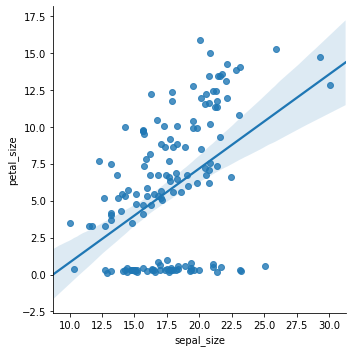

In [88]:
data['sepal_size']=data['sepal_length']*data['sepal_width']
data['petal_size']=data['petal_length']*data['petal_width']
sns.lmplot(x='sepal_size',y='petal_size',data=data)

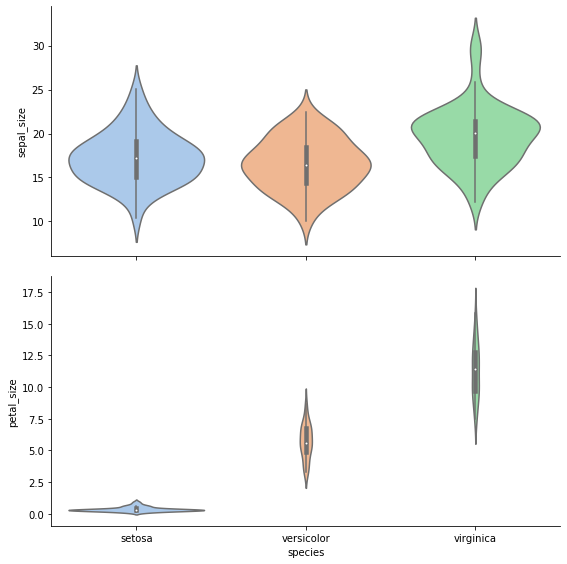

In [90]:
g = sns.PairGrid(data,
                 x_vars=["species"],
                 y_vars=["sepal_size", "petal_size"],
                 aspect=2, size=4)
g.map(sns.violinplot, palette="pastel");